Note: Same name variables have been used in this file. Please run from the begining each time!

In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("../Scripts/Impurity.jl")
includet("KM_Model.jl")

In [22]:
Nx = 3
Ny = 3
p = 1
q = 3
pn = 2
U = 1000

N_Site = Nx*Ny
N = N_Site
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0
Cut_Off = Nx*Ny

V = 0.5
Vrand = 0
NPin = 2

2

In [23]:
Cut_Off

9

In [24]:
matrix = KM(Nx, Ny, t, p, q);

In [25]:
V0 = [V, V]; Imp_Site = [1, 5]
Impurity_Data = Impurity(V0, Imp_Site)

Impurity([0.5, 0.5], [1, 5])

In [26]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)

DomainError: DomainError with -2:
`n` must not be negative.

# PROJECTION

#### Hard-Core: On

In [27]:
HardCore = true
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [28]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [29]:
Total_H = HHubbard + Impurity_H;

In [30]:
ϵ_proj_hard_core, psi = eigenstates(Total_H);


#### Hard-Core: Off

In [31]:
HardCore = false
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [32]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [33]:
Total_H = HHubbard + Impurity_H;

In [34]:
ϵ_proj_finite, λ_proj_finite = eigenstates(Total_H);


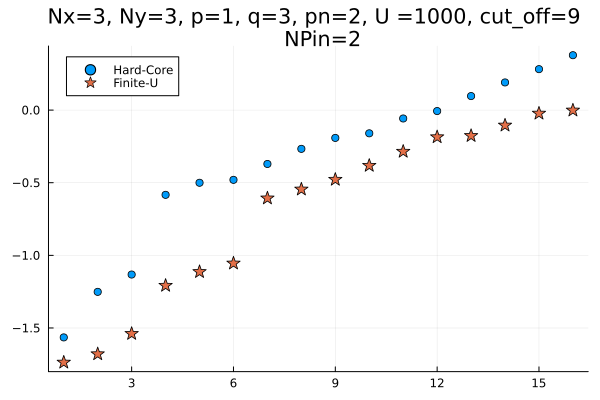

In [35]:
n = 1 
m = 16

scatter(ϵ_proj_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")
scatter!(ϵ_proj_finite[n:m], markershape=:star,markersize=7, label="Finite-U")

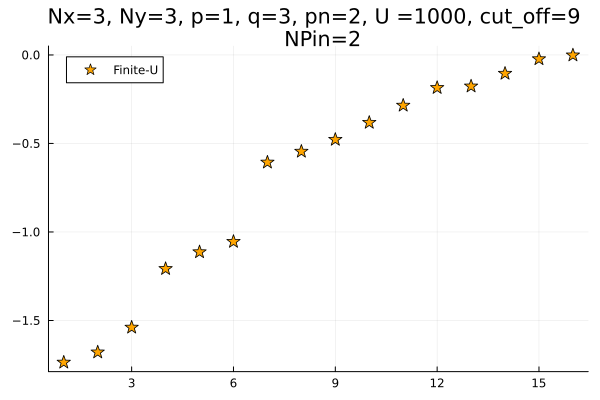

In [36]:
scatter(ϵ_proj_finite[n:m], markershape=:star,markersize=7, color=:orange, label="Finite-U",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")

# WITHOUT PROJECTION

#### Hard-Core: On

In [37]:
HardCore = true
HHubbard, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [38]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [39]:
Total_H = HHubbard + Impurity_H;

In [40]:
ϵ_hard_core, psi = eigenstates(dense(Total_H));

#### Hard-Core: Off

In [41]:
HardCore = false
HHubbard, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [42]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [43]:
Total_H = HHubbard + Impurity_H;

In [44]:
E_finite_u, psi = eigenstates(dense(Total_H));

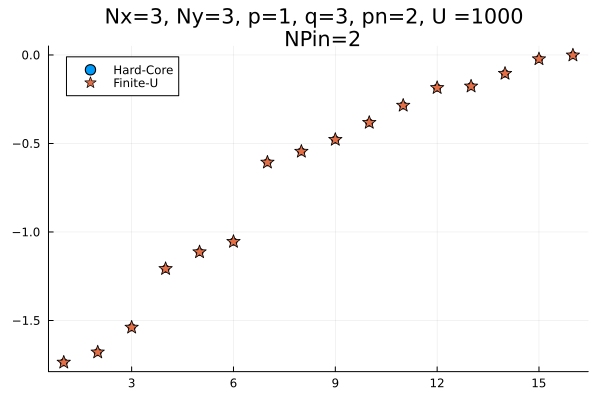

In [46]:
n = 1 
m = 16

scatter(ϵ_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n NPin=$(NPin)")
scatter!(E_finite_u[n:m], markershape=:star,markersize=7, label="Finite-U")

# CHECK WHETHER IF PROJECTION CODE WORKING CORRECTLY !

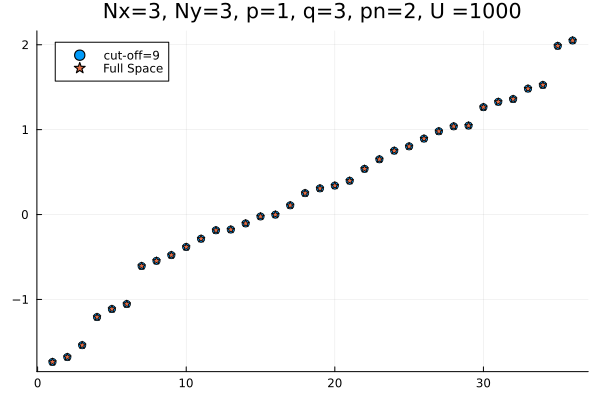

In [49]:
n=1
m=36
scatter(ϵ_proj_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_finite_u[n:m], label="Full Space",marker=:star)